In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [7]:
y.shape, X.shape

((768,), (768, 8))

In [8]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [9]:
logistic.fit(X, y)

/Users/boris/Desktop/projects/ml-practice/ML1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252347e-01  3.36000361e-02 -1.40873260e-02 -1.27041376e-03
 -1.24033230e-03  7.72021271e-02  1.41904234e+00  1.00351859e-02]


In [11]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234717220794
Glucose 0.03360003614734651
BloodPressure -0.014087326030271421
SkinThickness -0.0012704137620638983
Insulin -0.0012403322998089216
BMI 0.07720212710281382
DiabetesPedigreeFunction 1.41904233721971
Age 0.01003518588591686


In [12]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70293005]


In [13]:
y_pred = logistic.predict(X)

In [14]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [17]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

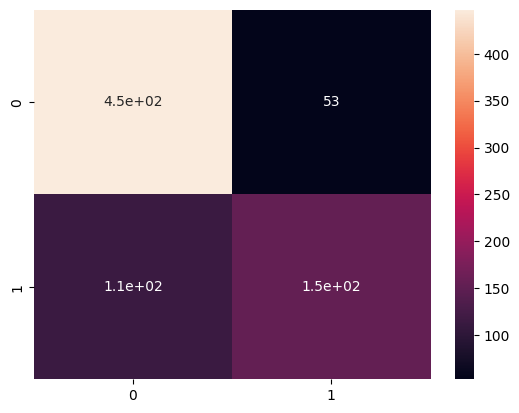

In [18]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [19]:
logistic.score(X, y)

0.7825520833333334

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(2)

In [24]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]], shape=(768, 45))

In [25]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/Users/boris/Desktop/projects/ml-practice/ML1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Task 1

In [26]:
from sklearn.linear_model import LogisticRegression

# Обучение модели
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

# Выводим информацию
print("Коэффициенты:", logistic.coef_)
print("Свободный коэффициент:", logistic.intercept_)
print("Количество итераций:", logistic.n_iter_)
print("Классы:", logistic.classes_)

Коэффициенты: [[ 1.22504738e-01  3.51113707e-02 -1.32994296e-02  7.77902175e-04
  -1.17367075e-03  8.96557938e-02  8.67699533e-01  1.49840707e-02]]
Свободный коэффициент: [-8.36528084]
Количество итераций: [180]
Классы: [0 1]


## Что можно менять:
#### max_iter: увеличив число итераций, можно добиться лучшей сходимости.

#### C: параметр регуляризации. Уменьшение значения C увеличивает регуляризацию.

#### solver: можно изменить метод оптимизации, например, на saga, который лучше работает с большими данными.

# Task 2

Logistic Regression Accuracy: 0.7359
Confusion Matrix for Logistic Regression:
[[120  31]
 [ 30  50]]



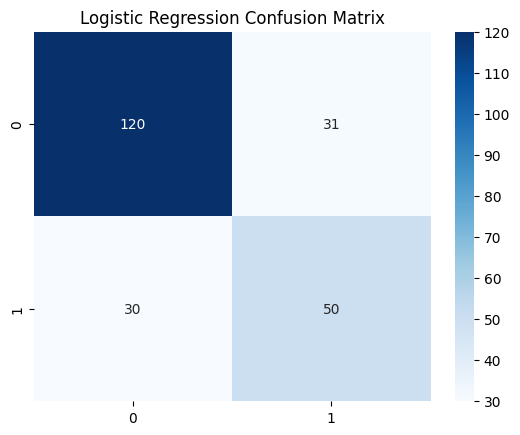

SVM (Linear) Accuracy: 0.7446
Confusion Matrix for SVM (Linear):
[[122  29]
 [ 30  50]]



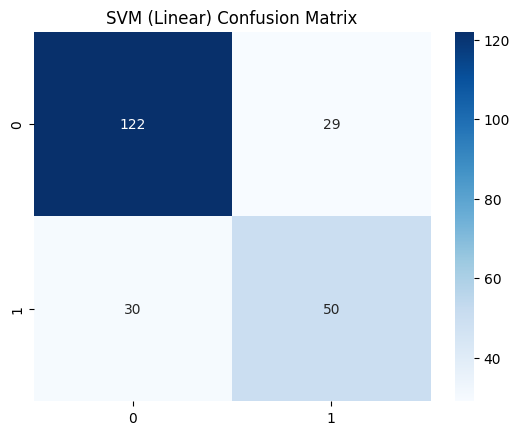

SVM (RBF) Accuracy: 0.7359
Confusion Matrix for SVM (RBF):
[[131  20]
 [ 41  39]]



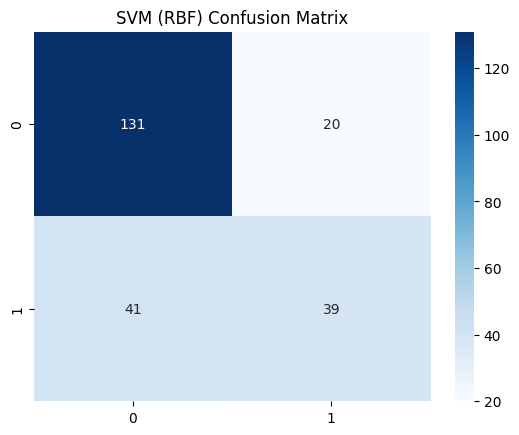

SVM (Polynomial) Accuracy: 0.7489
Confusion Matrix for SVM (Polynomial):
[[133  18]
 [ 40  40]]



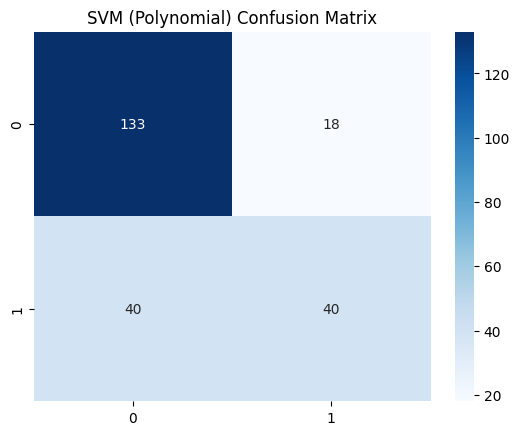

KNN Accuracy: 0.6883
Confusion Matrix for KNN:
[[114  37]
 [ 35  45]]



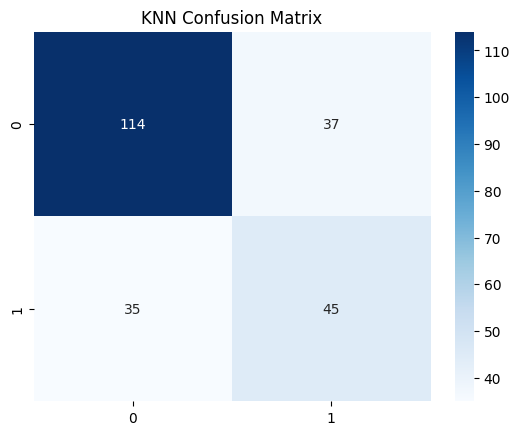

MLP Accuracy: 0.6883
Confusion Matrix for MLP:
[[134  17]
 [ 55  25]]



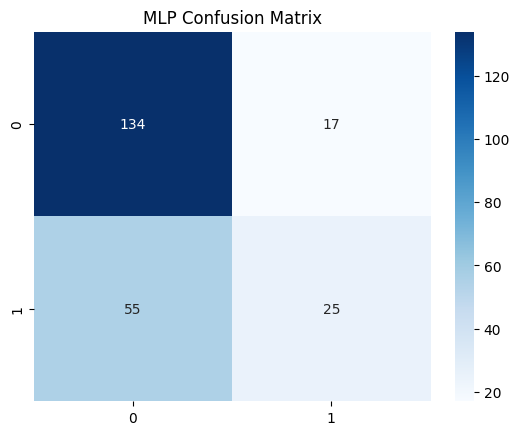

Decision Tree Accuracy: 0.7100
Confusion Matrix for Decision Tree:
[[111  40]
 [ 27  53]]



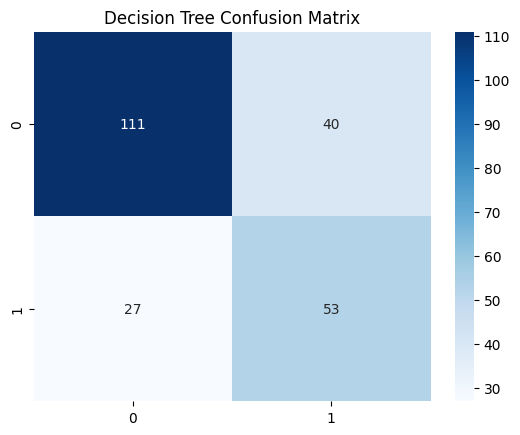

Naive Bayes Accuracy: 0.7446
Confusion Matrix for Naive Bayes:
[[119  32]
 [ 27  53]]



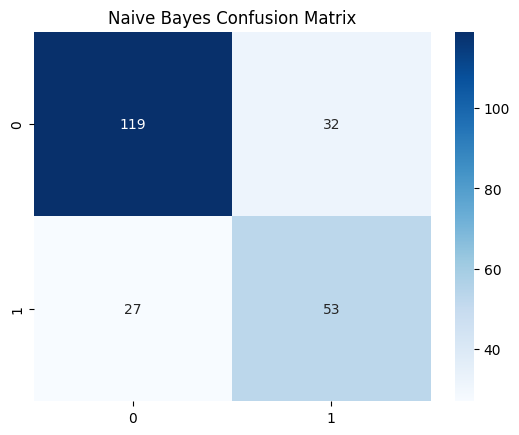

In [28]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим словарь моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (Linear)': SVC(kernel='linear'),
    'SVM (RBF)': SVC(kernel='rbf'),
    'SVM (Polynomial)': SVC(kernel='poly'),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Функция для обучения и оценки моделей
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        cm = metrics.confusion_matrix(y_test, y_pred)
        
        print(f'{name} Accuracy: {accuracy:.4f}')
        print(f'Confusion Matrix for {name}:\n{cm}\n')
        
        # Визуализируем матрицу классификации
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.show()

# Оценка всех моделей
evaluate_models(models, X_train, X_test, y_train, y_test)

# Task 4

Logistic Regression Accuracy: 1.0000
Confusion Matrix for Logistic Regression:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]



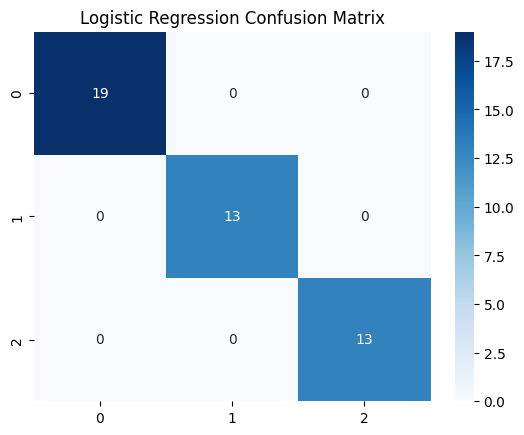

SVM (Linear) Accuracy: 1.0000
Confusion Matrix for SVM (Linear):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]



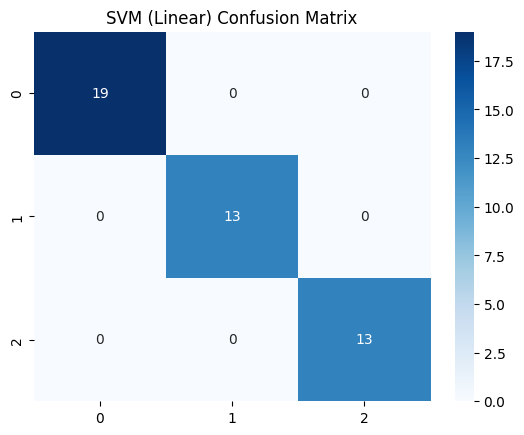

SVM (RBF) Accuracy: 1.0000
Confusion Matrix for SVM (RBF):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]



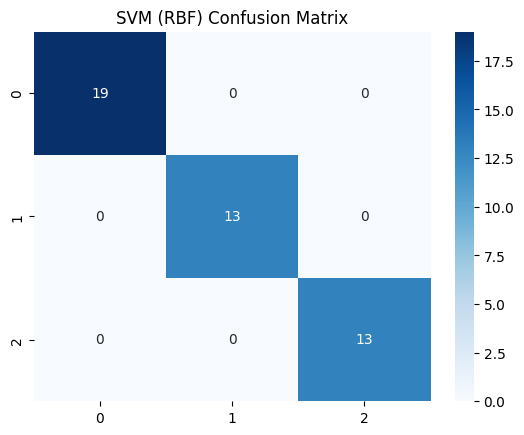

SVM (Polynomial) Accuracy: 0.9778
Confusion Matrix for SVM (Polynomial):
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]



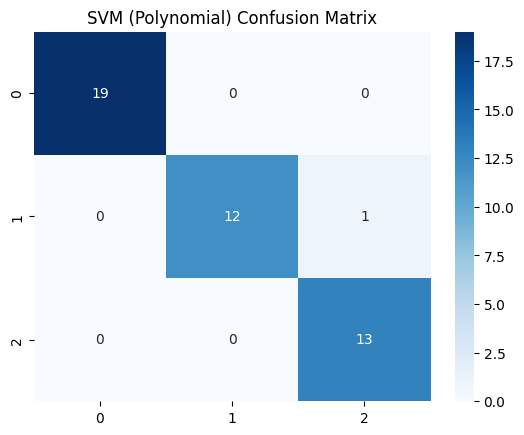

KNN Accuracy: 1.0000
Confusion Matrix for KNN:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]



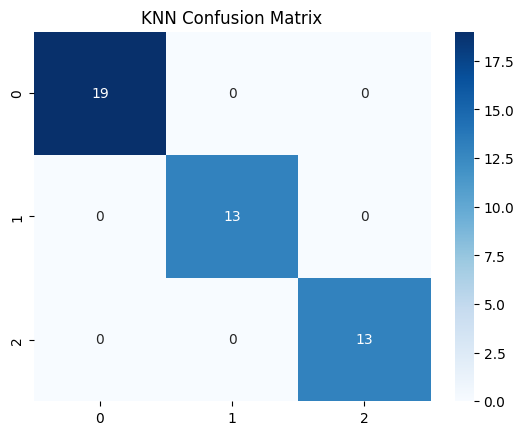

MLP Accuracy: 1.0000
Confusion Matrix for MLP:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]



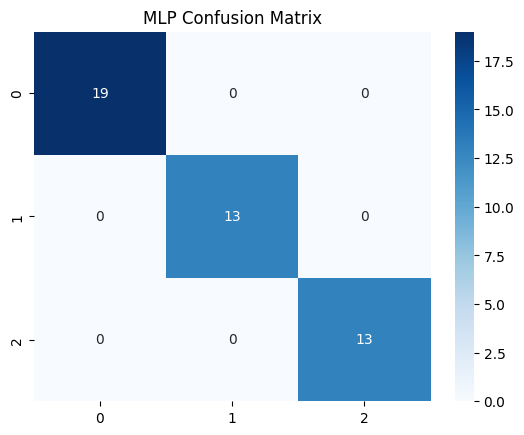

Decision Tree Accuracy: 1.0000
Confusion Matrix for Decision Tree:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]



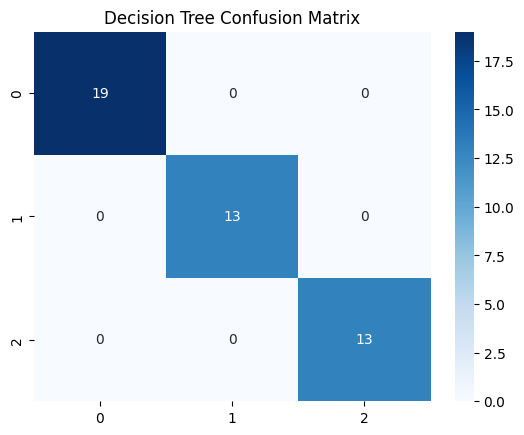

Naive Bayes Accuracy: 0.9778
Confusion Matrix for Naive Bayes:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]



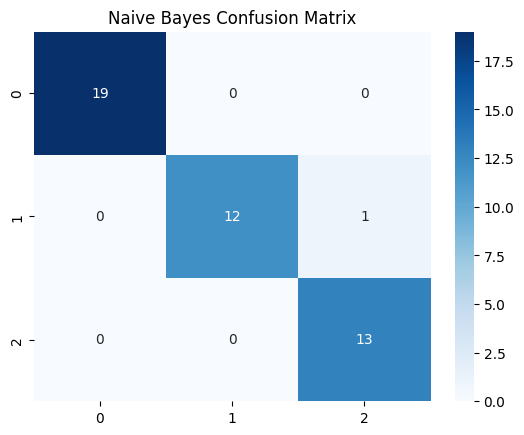

In [29]:
from sklearn.datasets import load_iris

# Загрузим данные ирисов
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Разделим данные на обучающую и тестовую выборки
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Оценим модели на данных ирисов
evaluate_models(models, X_train_iris, X_test_iris, y_train_iris, y_test_iris)